# Secret Whiteboard

## Team Members

Fenno Boomgaarden (Fach-Bachelor Informatik)

Hauke Redemann (Fach-Bachelor Informatik)

Keno Rott (Fach-Bachelor Informatik)

# Use cases

## Privacy in real-life video streaming

- In common screen-capturing softwares like OBS it is possible to select which windows with non-sensitive information are captured.
- Streaming in real-life **has no mechanisms** like that.
- The only option to protect the personal information of the streamer and/or others is **image processing**.
- **Hide sensitive information** while streaming on platforms like YouTube and Twitch.

For example a streamer shows his/her appartment to his/her viewers and (s)he has some sensitive information on the kitchen fridge (s)he wants to hide.

## Lecture recording software

- Some universities use **automated systems** for lecture recording.
- Lectures may contain **sensistive data** that should not be public:
  - Access credentials to private webservers
  - Copyrighted information
  - Solutions for exam exercises (so they can be used again in the future)
- Provide a way to hide sensitive information **without manually editing** the video.

# Project Milestones

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage import io

## 1. Preprocessing
Differentiate the drawing from the whiteboard background and filter out light reflections.
- Gaussian Blur (https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html)
- Adaptive Thresholding (https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html)
- Erosion/Dilatation (https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html)

### Read image


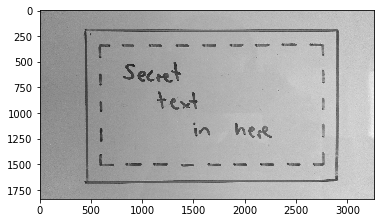

In [5]:
img_read = io.imread("https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-secret-whiteboard/master/img/samples/sample0.jpg")
img = cv.cvtColor(img_read, cv.COLOR_BGR2GRAY)
img_color = cv.cvtColor(img_read, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap="gray")

### Gaussian Blur and Adaptive Thresholding

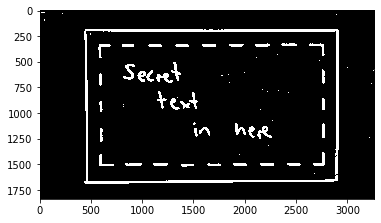

In [6]:
img2 = cv.GaussianBlur(img,(5,5),0)
img3 = cv.adaptiveThreshold(img2, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 201, 8)
plt.imshow(img3, cmap="gray")

## 2. Contour detection and approximation
Detect all contours in the thresholded image and approximate contours with less vertices.
- Contour detection (https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html)
- Contour approximation (https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html)

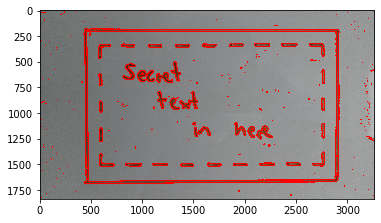

In [7]:
contours, hierarchy = cv.findContours(img3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_color, contours, -1, (255,0,0), 10)
plt.imshow(img_color)

## 3. Object recognition
Detect rectangles based on the number of boundary points of the approximated contour, contour properties and all angles.

- Number of boundary points = 4?
- How rectangular is the shape?

  $Extent = \frac{Object Area}{Bounding Rectangle Area}$
  
- Angles = 90°?

![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-secret-whiteboard/master/img/sample1_3_detect_rectangle.png)

## 4. Pattern detection
Find dashed lines inside the rectangles to determine if the corresponding area should be blackened.


### Inner margin
Define an inner margin inside the rectangle, where dashed line is allowed.

![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-secret-whiteboard/master/img/sample1_5_1_split_image_to_parts.png)

### Image Extraction 
Extract all margin areas (left, right, bottom, top) as separate images.

![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-secret-whiteboard/master/img/sample1_5_3_left_rotated.png)

![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-secret-whiteboard/master/img/sample1_5_3_right_rotated.png)

![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-secret-whiteboard/master/img/sample1_5_2_bottom.png)

![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-secret-whiteboard/master/img/sample1_5_2_top.png)

### Detect dashed lines
- Create a 1-dimensional array with the same width as the current area.
- Initialize the array with zeroes.
- Detect contours of line segments.
- Get leftmost and rightmost pixel of the outline.
- Set all corresponding x values in the array to 255 (interval $[leftmost,rightmost]$).

![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-secret-whiteboard/master/img/sample1_5_3_left_rotated_1d_array.png)

## 5. Image Manipulation
Draw and fill out a rectangular shape (bounding rectangle of outer contour) for every detected pattern.

![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-secret-whiteboard/master/img/sample1_6_final_picture.png)